In [232]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [233]:
def draw_hist(img, histogram = True,one_channel = True, cdf = False):
    if(histogram == True):
        if(one_channel == True):
            hist = cv2.calcHist([img],[0],None,[256],[0,256])
            plt.plot(hist)
        else:
            for channel, col in enumerate(['r','g','b']):
                hist = cv2.calcHist([img],[channel],None,[256],[0,256])
                plt.plot(hist, color = col)
            plt.legend(["Red","Blue","Green"])
    if(cdf):
        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        c = hist.cumsum()
        plt.plot(c)

In [234]:
def compare_imgs(old_img, new_img, w = 15, h = 6, old_title = "Old Img", new_title = "New Img"):
    fig,ax = plt.subplots(1,2,figsize=(w,h))
    ax[0].imshow(old_img)
    ax[0].set_title(old_title)
    ax[1].imshow(new_img)
    ax[1].set_title(new_title)

# __Linear Transform__

In [235]:
lt_raw_img = cv2.imread("./img/Fig0310(b)(washed_out_pollen_image).png")

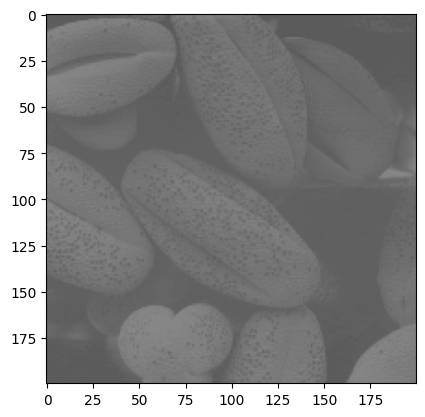

In [236]:
plt.imshow(lt_raw_img)

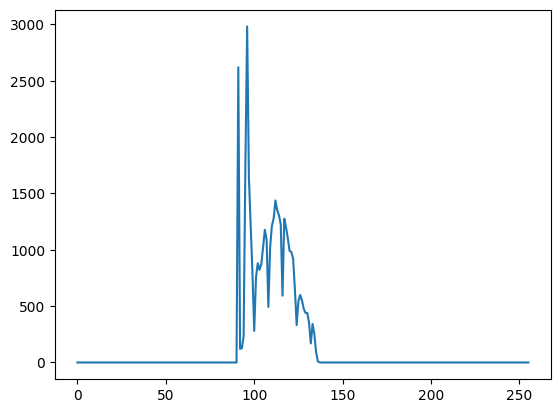

In [237]:
draw_hist(lt_raw_img)

In [238]:
def createLUT(minI,maxI):
    lut = np.empty(256)
    for i in range(256):
        lut[i] = np.clip((i-minI)/(maxI-minI)*255,0,255)
    return lut

In [239]:
minI = int(np.min(lt_raw_img))
maxI = int(np.max(lt_raw_img))

print(minI,maxI)

91 137


In [240]:
lut = createLUT(minI,maxI)

lt_new_img = np.empty_like(lt_raw_img)
for channel in range(lt_raw_img.shape[2]):
    lt_new_img[...,channel] = lut[lt_raw_img[...,channel]]

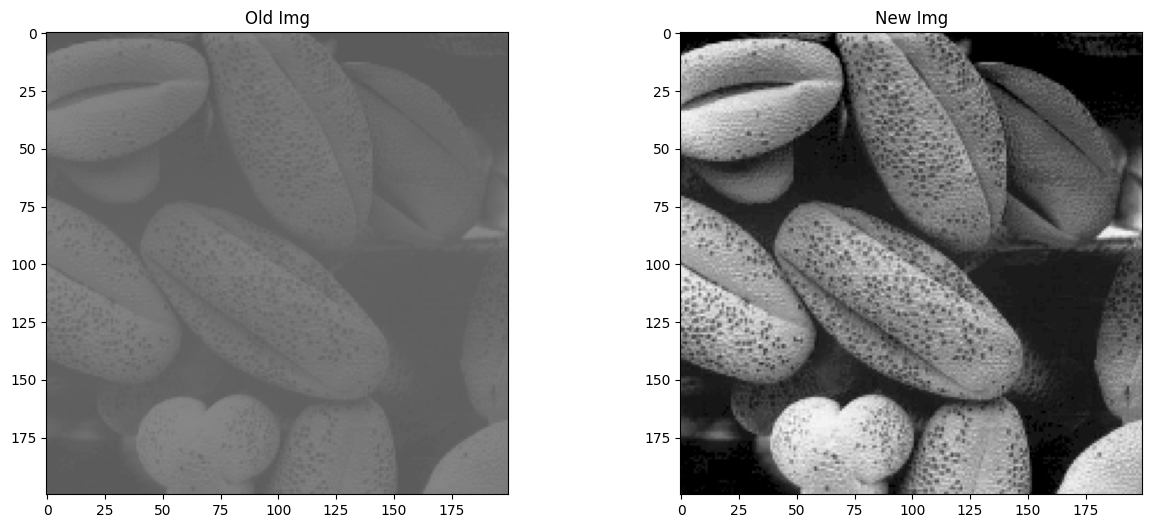

In [241]:
compare_imgs(lt_raw_img,lt_new_img)

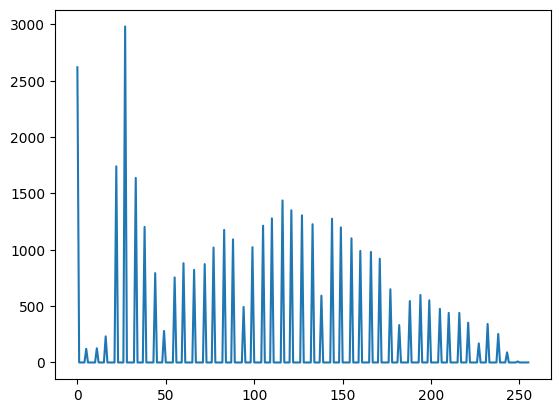

In [242]:
draw_hist(lt_new_img)

# __Histogram Equalization__

__Công thức toán__ <br>
$f(g) = max(0,round(\frac{t(g)}{TB}-1))$ <br>
Với <br>
$TB = \frac{m*n}{new-level}$ <br>
new_level: mức xám mong muốn mới <br>
t(g): histogram cộng dồn ở mức g

In [243]:
def equaliztion(channel,new_level):
    m,n = channel.shape
    TB = m*n/new_level
    hist = cv2.calcHist([channel],[0],None,[256],[0,256])
    tg = hist.cumsum()
    fg = np.maximum(0,np.round(tg/TB-1)).astype('uint8')
    equlized = fg[channel]
    return equlized

# equalized = fg[channel] -> mã giả
# for i = 0 to 255:
#   for j = 0 to 255:
#       equalized[i][j] = fg[channel[i][j]]

def apply_he(img,new_level):
    r,g,b = cv2.split(img)
    r_e = equaliztion(r,new_level)
    g_e = equaliztion(g,new_level)
    b_e = equaliztion(b,new_level)
    applied_img = cv2.merge((r_e,g_e,b_e))
    return applied_img

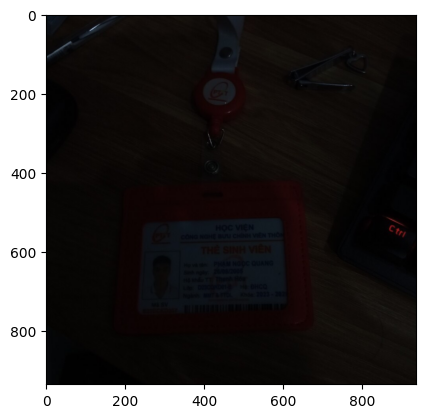

In [244]:
he_raw_img = cv2.imread('./img/IMG_20241015_181539.jpg')
he_raw_img = cv2.cvtColor(he_raw_img,cv2.COLOR_BGR2RGB)

plt.imshow(he_raw_img)

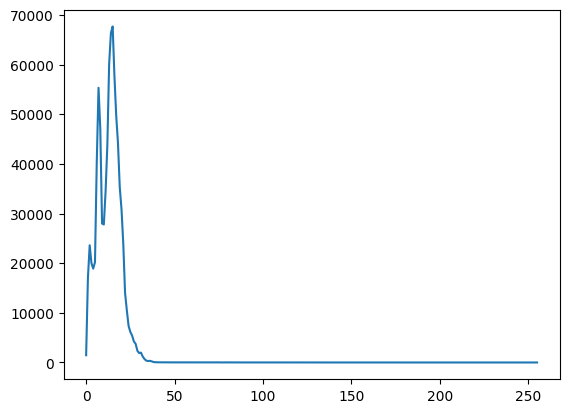

In [245]:
draw_hist(he_raw_img)

Text(0.5, 1.0, 'CDF')

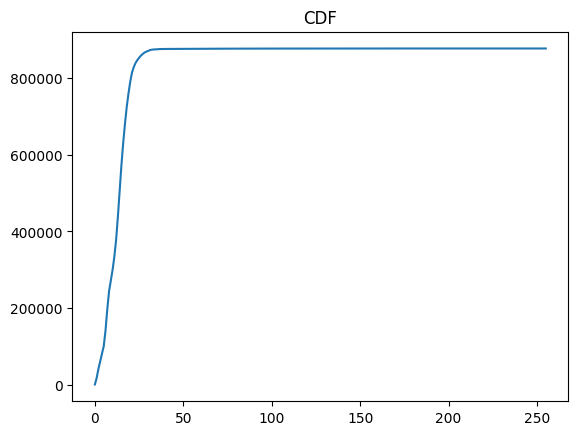

In [246]:
draw_hist(he_raw_img,histogram=False,one_channel=True,cdf=True)
plt.title("CDF")

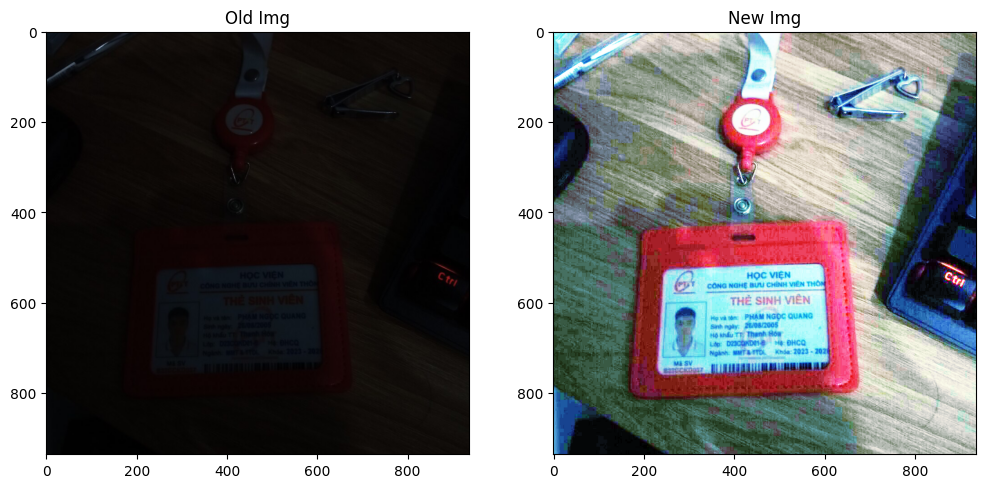

In [247]:
he_new_img = apply_he(he_raw_img,256)

compare_imgs(he_raw_img,he_new_img,12,6)

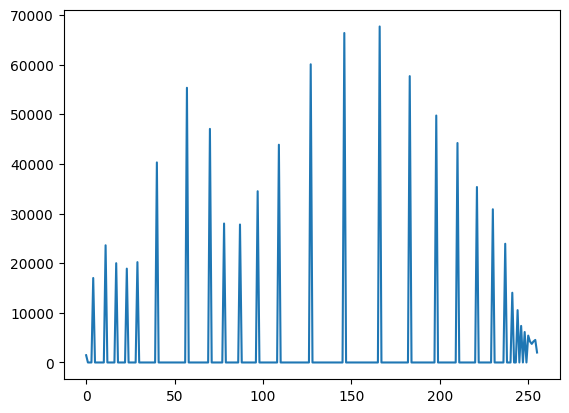

In [248]:
draw_hist(he_new_img)

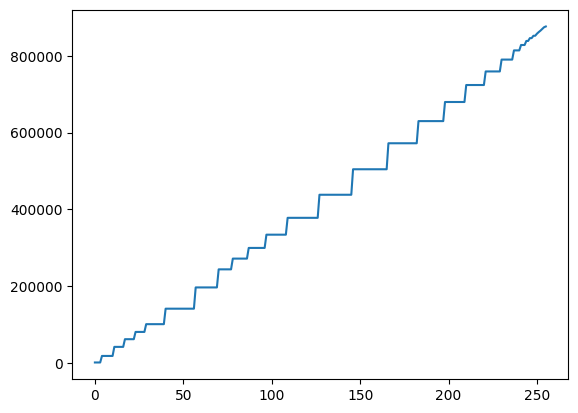

In [249]:
draw_hist(he_new_img,histogram=False,one_channel=False,cdf=True)

# __Contrast Limit Adaptive Histgram Equaliztion__

In [250]:
cimg = cv2.imread('./img/tem.jpg')
cimg_raw = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)

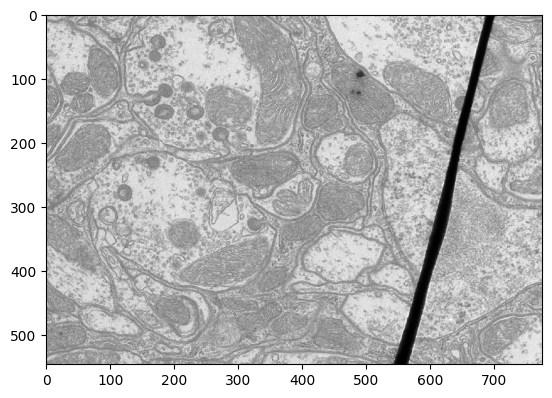

In [251]:
plt.imshow(cimg_raw)

Text(0.5, 1.0, 'Histogram')

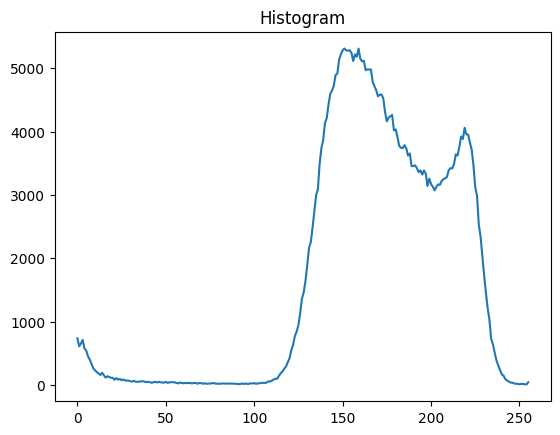

In [252]:
draw_hist(cimg_raw)
plt.title("Histogram")

Text(0.5, 1.0, 'CDF')

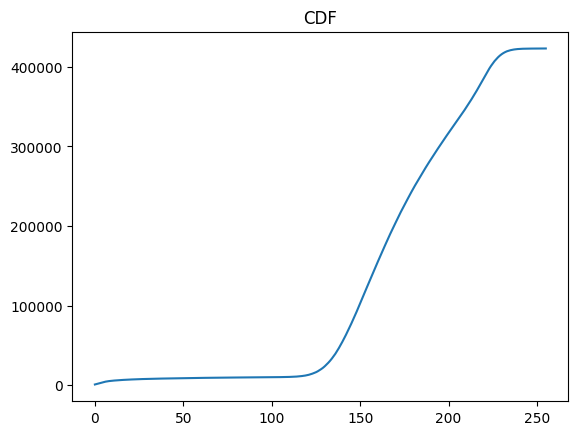

In [253]:
draw_hist(cimg_raw,histogram=False,one_channel=True,cdf=True)
plt.title("CDF")

In [254]:
clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(2,2))
cr,cg,cb = cv2.split(cimg_raw)
r = clahe.apply(cr)
g = clahe.apply(cg)
b = clahe.apply(cb)
c_new_img = cv2.merge((r,g,b))

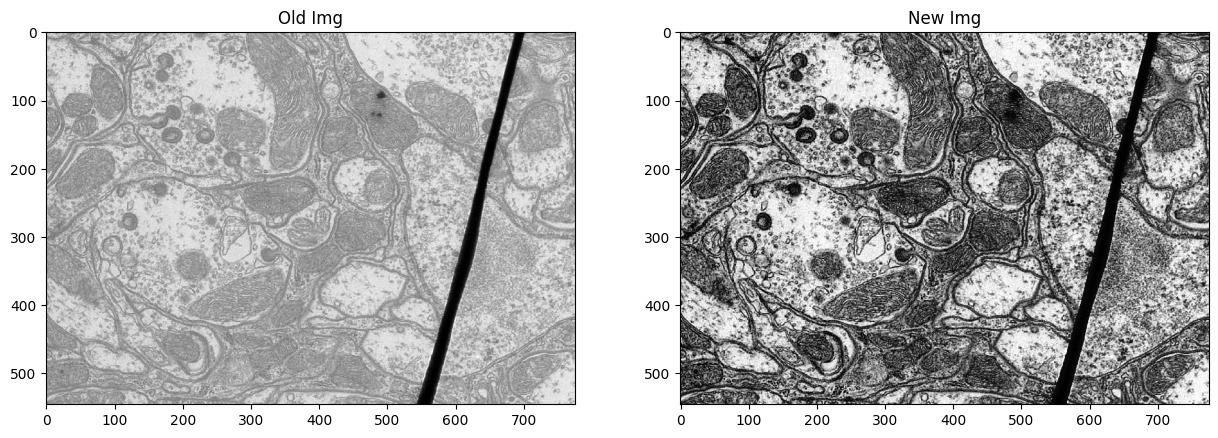

In [255]:
compare_imgs(cimg_raw,c_new_img)

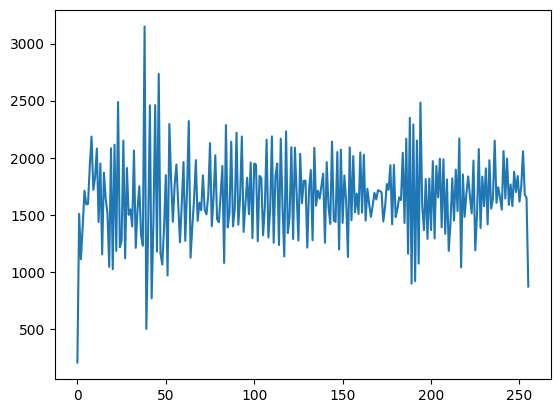

In [256]:
draw_hist(c_new_img)

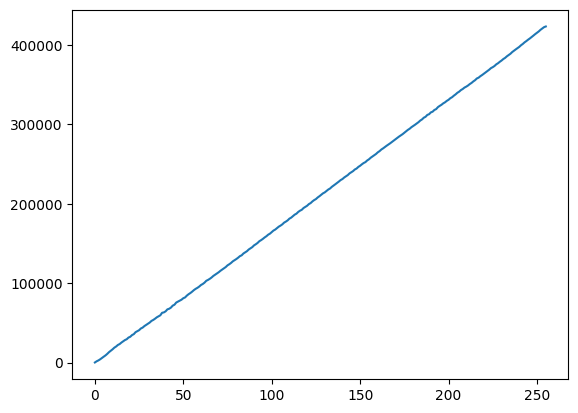

In [257]:
draw_hist(c_new_img,histogram=False,one_channel=True,cdf=True)